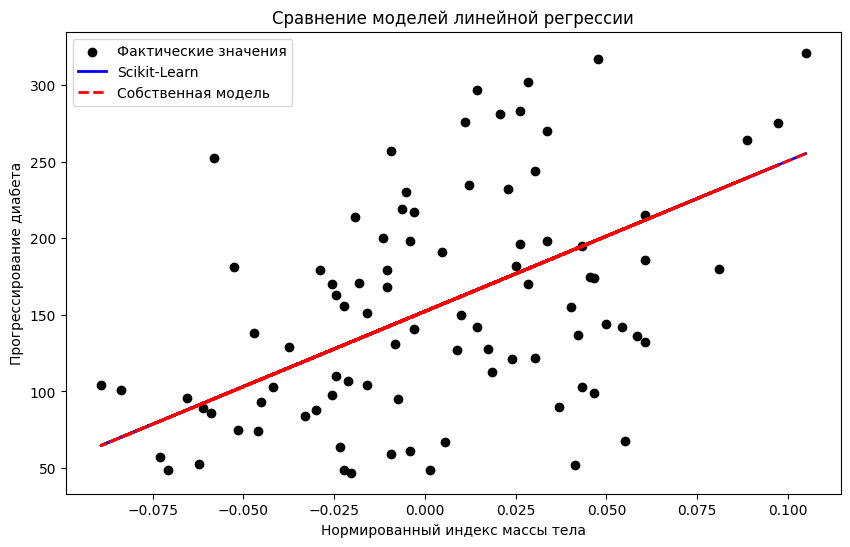


Коэффициенты:
Scikit-Learn: intercept = 152.29, coef = 981.66
Собственная модель: intercept = 152.29, coef = 981.66

Метрики качества:
Metric     | Scikit-Learn | Custom Model
----------------------------------------
MAE        | 52.94        | 52.94       
R²         | 0.191        | 0.191       
MAPE (%)   | 45.17        | 45.17       



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


diabetes = datasets.load_diabetes()
X = diabetes.data[:, 2].reshape(-1, 1)  # Используем 3-й признак (индекс массы тела)
y = diabetes.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Линейная регрессия с помощью Scikit-Learn
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
sklearn_pred = sklearn_reg.predict(X_test)

# Собственная реализация линейной регрессии
# Добавляем столбец единиц для intercept
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Вычисляем коэффициенты: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

# Предсказания собственной модели
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]
custom_pred = X_test_with_intercept @ theta

# Метрики качества
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Для Scikit-Learn
mae_sk = mean_absolute_error(y_test, sklearn_pred)
r2_sk = r2_score(y_test, sklearn_pred)
mape_sk = mean_absolute_percentage_error(y_test, sklearn_pred)

# Для собственной модели
mae_custom = mean_absolute_error(y_test, custom_pred)
r2_custom = r2_score(y_test, custom_pred)
mape_custom = mean_absolute_percentage_error(y_test, custom_pred)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Фактические значения')
plt.plot(X_test, sklearn_pred, color='blue', linewidth=2, label='Scikit-Learn')
plt.plot(X_test, custom_pred, color='red', linestyle='--', linewidth=2, label='Собственная модель')
plt.xlabel('Нормированный индекс массы тела')
plt.ylabel('Прогрессирование диабета')
plt.title('Сравнение моделей линейной регрессии')
plt.legend()
plt.show()

print("\nКоэффициенты:")
print(f"Scikit-Learn: intercept = {sklearn_reg.intercept_:.2f}, coef = {sklearn_reg.coef_[0]:.2f}")
print(f"Собственная модель: intercept = {theta[0]:.2f}, coef = {theta[1]:.2f}\n")

print("Метрики качества:")
print(f"{'Metric':<10} | {'Scikit-Learn':<12} | {'Custom Model':<12}")
print("-" * 40)
print(f"{'MAE':<10} | {mae_sk:<12.2f} | {mae_custom:<12.2f}")
print(f"{'R²':<10} | {r2_sk:<12.3f} | {r2_custom:<12.3f}")
print(f"{'MAPE (%)':<10} | {mape_sk:<12.2f} | {mape_custom:<12.2f}\n")


Модель имеет низкое качество (R² = 0.19, MAE = 52.94, MAPE = 45.17%).

Объясняет лишь 19% дисперсии данных.

Средняя ошибка прогноза: ±53 единицы (45% от фактических значений).